# BCB546X Python Assignment Jupyter Notebook
## Christian Montes-Serey

Loading (importing) the required packages

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## First function ##
Dr. X: this gets sequences.
Please finish documenting this function with comments, or in notebook markdown text.
Your descriptions of all functions should contain information about what the function does, as well as information about the return types and arguments.

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

**First function explained:**  
We are defining (creating) a function called `get_seqences_from_file`. We have to provide the `fasta_fn` argument when using this function. This is, providing a **fasta** format file.  
The `get_seqences_from_file` function does the following:  
1. Creates an empty dictionary object, called `sequence_data_dict`  
2. Starts a `for` loop that goes through each record in the provided **fasta** file (the `SeqIO.parse` function is used to access the file content and the `record` variable is used to store the parsed record). Each loop do:  
2.1. Creates an object called `description`that stores the "fasta header" of the record. The `split()` function separate the header text into a `list` of elements, using the blank space to define each element.  
2.2. Creates an object called `species_name` that have the second and third element of the `description` list object (with a blank space between the elements). This gave us exactly the taxonomic binomial nomenclature for the species whose DNA sequence belongs to.  
2.3. Add the DNA sequence of `record` to our `sequemce_data_dict` dictionary using the species taxonimic name as the index.  
3. After looping through every `record` element of `fasta_fn`, the function uses the `return` function to return the created dictionary.

## Second function ##
The following function takea a string of DNA sequence and makes the translation until it reaches the first "stop" codon. This function uses the "Vertebrate Mitochondrial" codon table.

In [3]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    i = 0
    while i < len(string_nucleotides):
        codon = string_nucleotides[i:i+3]
        if (codon == 'TAG' or codon == 'TAA' or codon == 'AGA' or codon == 'AGG'):
            break
        aa = mito_table.forward_table[codon]
        aa_seq_string += aa
        i += 3
    return(aa_seq_string)

**Second function explained:**  
Here, we are creating a function called `translate_function` that requires the `string_nucleotides` input argument. This argument must be a DNA sequence string. It is adviced to provide the sequence as a `string` type object. If the sequence is provided as a `Seq` type object, we can coerce it to `string` type using `str(string_nucleitides)`.  
  
The function is divided into the following steps:  
1. Creates an object called "mito_table" wich contains the codon usage table.
2. Creates an empty `string`-type object called "aa_seq_string"
3. Creates an numeric object called "i" and sets the value of our object "i" to 0. This object is going to be used later as a variable.
4. Starts a "while" loop that will go on until the value of "i" is greater than the length of the sequence defined by `string_nucleotides`. This loop will do as follows:  
4.1. Creates an object called "codon" that contains a slice of `string_nucleotides`. This slice is three nucleotides long (from i to i+3).  
4.2. Starts an "if" statement with two options:  
    4.2.1. If the sequence stored in "codon" is equal to one of the known "stop" codons (according to vertebrate mitochondrial codon usage table), the loop will end.  
    4.2.2. If the sequence in "codon" is not one of those "stop" codons, then the code will do the following:  
        4.2.2.1. Creates an object called "aa", which caontains the one-letter aminoacid symbol that corresponds to the 
        translation of the sequence in "codon", according to the vertebrate mitochondrial codon usage table.  
        4.2.2.2. Adds the one-letter aminoacid symbol in the object "aa" to the object "aa_seq_string".  
        4.2.2.3. Increases the value of the object "i" by 3. In order to grab the following 3 nucleotides of 
        `string_nucleotides` on the next round of loop.

Once the loop is done, the function returns the obtained aminocid sequence, by using the `return` function on the object "aa_seq_string".

## Third function ##
The following function takes a string of DNA sequence and makes the translation until it reaches the first "stop" codon. This function uses the "Vertebrate Mitochondrial" codon table. I made this function using the information provided in the [biopython cookbook](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25)

In [4]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
def imp_translate_function(string_nucleotides):
    coding_dna = Seq(string_nucleotides, IUPAC.unambiguous_dna)
    aa_seq_string = coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return(aa_seq_string)

**Third function explained:**  
Before start the function, we import the required packages. 

Here, we are creating a function called `imp_translate_function` that requires the `string_nucleotides` input argument. This argument must be a DNA sequence string. Same as with the previous function, it is adviced to provide the sequence as a `string` type object. If the sequence is provided as a `Seq` type object, we can coerce it to `string` type using `str(string_nucleitides)`.  
This function does as follows:
1. Creates a `Seq`-type object called "coding_dna" that contains the nucleotide DNA sequence of `string_nucleotides`.
2. Creates an object called "aa_seq_string" that will contain the one-letter aminoacid sequence for the translation of `string_nucleotides`, according to the vertebrate mitochondrial codon usage table. The translation will go until it reaches the first "stop" codon (also according to the vertebrate mitochondrial codon usage table).
3. It will finally return the obtained aminocid sequence, by using the `return` function on the object "aa_seq_string".

## Fourth function ##
This function takes an aminoacid sequence string and compute its molecular weight

In [5]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    seq_aa_weight = analysed_seq.molecular_weight()
    return(seq_aa_weight)

**Fourth function explained:**  
Before start the function, we import the required packages.  
  
We are creating a function called `compute_molecular_weight` that requires the `aa_seq` imput argument. This imput should be an one-letter aminocid sequence string. Therefor, if your imput comes as a `Seq`-type object, it must be coerced into a `string`-type object by using `str(aa_seq)`.  
This function do the following steps:  
1. Creates an object called "analysed_seq" that contains `aa_seq`, this object type is needed for the function to calculate molecular weight.
2. Creates an object called "seq_aa_weight" wich contains the molecular weight calculated for `aa_seq`
3. Return the calculated molecular weight by using the `return` function on the object "seq_aa_weight".

## Fifth function ##
This function takes a DNA sequence (or any other string of letters) and calculate the G/C content percentage

In [6]:
def get_GC_content(string_nucleotides):
    count = 0
    for base in string_nucleotides:
        if (base == 'G' or base == 'C'):
            count += 1
    return(count / len(string_nucleotides)*100)

**Fifth function explained:**  
We are creating a function called `get_GC_content` that requires the `string_nucleotides` argument. This argument must be a DNA sequence string (it can also be any string of letters). It is adviced to provide the sequence as a `string` type object. If the sequence is provided as a `Seq` type object, we can coerce it to `string` type using `str(string_nucleitides)`.  
This function does as follows:  
1. Creates a numeric object called "count" and sets the value of our object "count" to 0. This object is going to be used for counting the incidences of "G" and "C" on the provided sequence.
2. Starts a "for" loop that goes through each `base` (letter) on the provided `string_nucleotide`. For each loop iteration the code looks for a "G" or a "C" in `base`. If one of these letter is present in `base`, then "count" value increases by 1.
3. It finally returns the value of "count" divided by the total number of letters in `string_nucleotide`, multiplied by 100. This will give us the G/C percentage.

# Main #

In [7]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

In [8]:
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

### **Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.**  
### **Set the value to 'NaN' to indicate that these cells are currently empty.**

In [9]:
penguins_df['molecular_weight'] = 'NaN'
penguins_df['GC_content'] = 'NaN'

In [10]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


### **Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame**

In [11]:
for key, value in cytb_seqs.items():
    aa_seq = translate_function(str(value))
    mol_wght = compute_molecular_weight(str(aa_seq))
    GC_con = get_GC_content(value)
    penguins_df.loc[penguins_df['species'].str.contains(key), 'molecular_weight'] = mol_wght
    penguins_df.loc[penguins_df['species'].str.contains(key), 'GC_content'] = GC_con

**Code explained**  
This piece of code creates a "for" loop that goes though each element of the `cytb_seqs` dictionary created by the **first function**. Each iteration does as follows:
1. Uses the **second function** to translate the DNA string provided by the `value` variable (coerced into `string`-type). It creates an object called "aa_seq" to store the result of the function.
2. Uses the **fourth function** to calculate the molecular weight on the object "aa_seq". It creates an object called "mol_wght" to store the result of the function.
3. Uses the **fifth function** to calculate the G/C percentage on the `value` variable. It creates an object called "GC_con" to store the result of the function
4. Looks in the `penguin_df` dataframe for the cell that has in the `species` column the species name denoted by the `key` variable as row coordinate indicator, and the column `molecular_weight` (as column coordinate). It then replaces the value for this cell with the value in "mol_wght".
5. Looks in the `penguin_df` dataframe for the cell that has in the `species` column the species name denoted by the `key` variable as row coordinate indicator, and the column `GC_content` as column coordinate. It then replaces the value for this cell with the value in "GC_con".

In [12]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6,48.3815
1,Aptenodytes patagonicus,13.40,42563.7,49.6938
2,Eudyptes chrysocome,2.80,42475.6,51.1811
3,Eudyptes chrysolophus,4.50,42445.5,50.9186
4,Eudyptes sclateri,4.25,42475.6,50.8311
5,Eudyptula minor,1.60,42491.6,49.2563
6,Pygoscelis adeliae,4.60,42458.6,49.0814
7,Pygoscelis antarctica,4.10,42404.5,47.769
8,Pygoscelis papua,6.10,42595.9,47.1566
9,Spheniscus demersus,3.20,42431.5,48.294


### **Plot a bar-chart of the mass with the x-axes labeled with species names.**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
%matplotlib inline

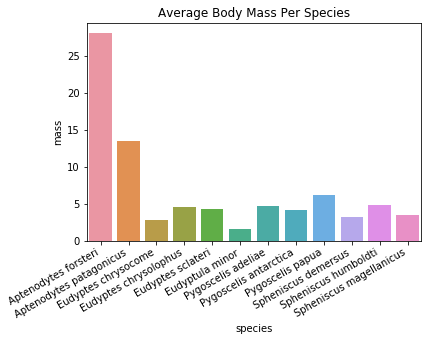

In [15]:
g = sns.barplot("species","mass", data=penguins_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_title('Average Body Mass Per Species')

## *Q1* What is the smallest penguin species?
### The smallest penguin species, according to this plot is *Edyptula minor*

## *Q2* What else is interesting about this species?
### The official Linux mascot, called "Tux" is an *E. minor* :)

### **Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).**

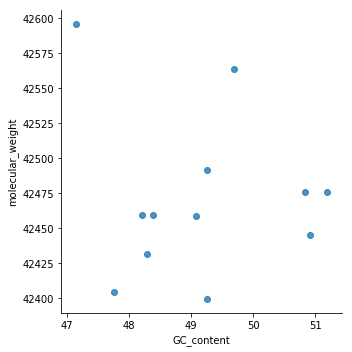

In [16]:
h = sns.lmplot("GC_content","molecular_weight", data=penguins_df, fit_reg=False)

### **Save the new DataFrame to a file called "penguins_mass_cytb.csv"**

In [17]:
penguins_df.to_csv("penguins_mass_cytb.csv", index = False)